<a href="https://colab.research.google.com/github/wesley-pm/crimePrediction_CG/blob/main/Crime%20Prediction%20-%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Etapa de Entendimento do Negócio

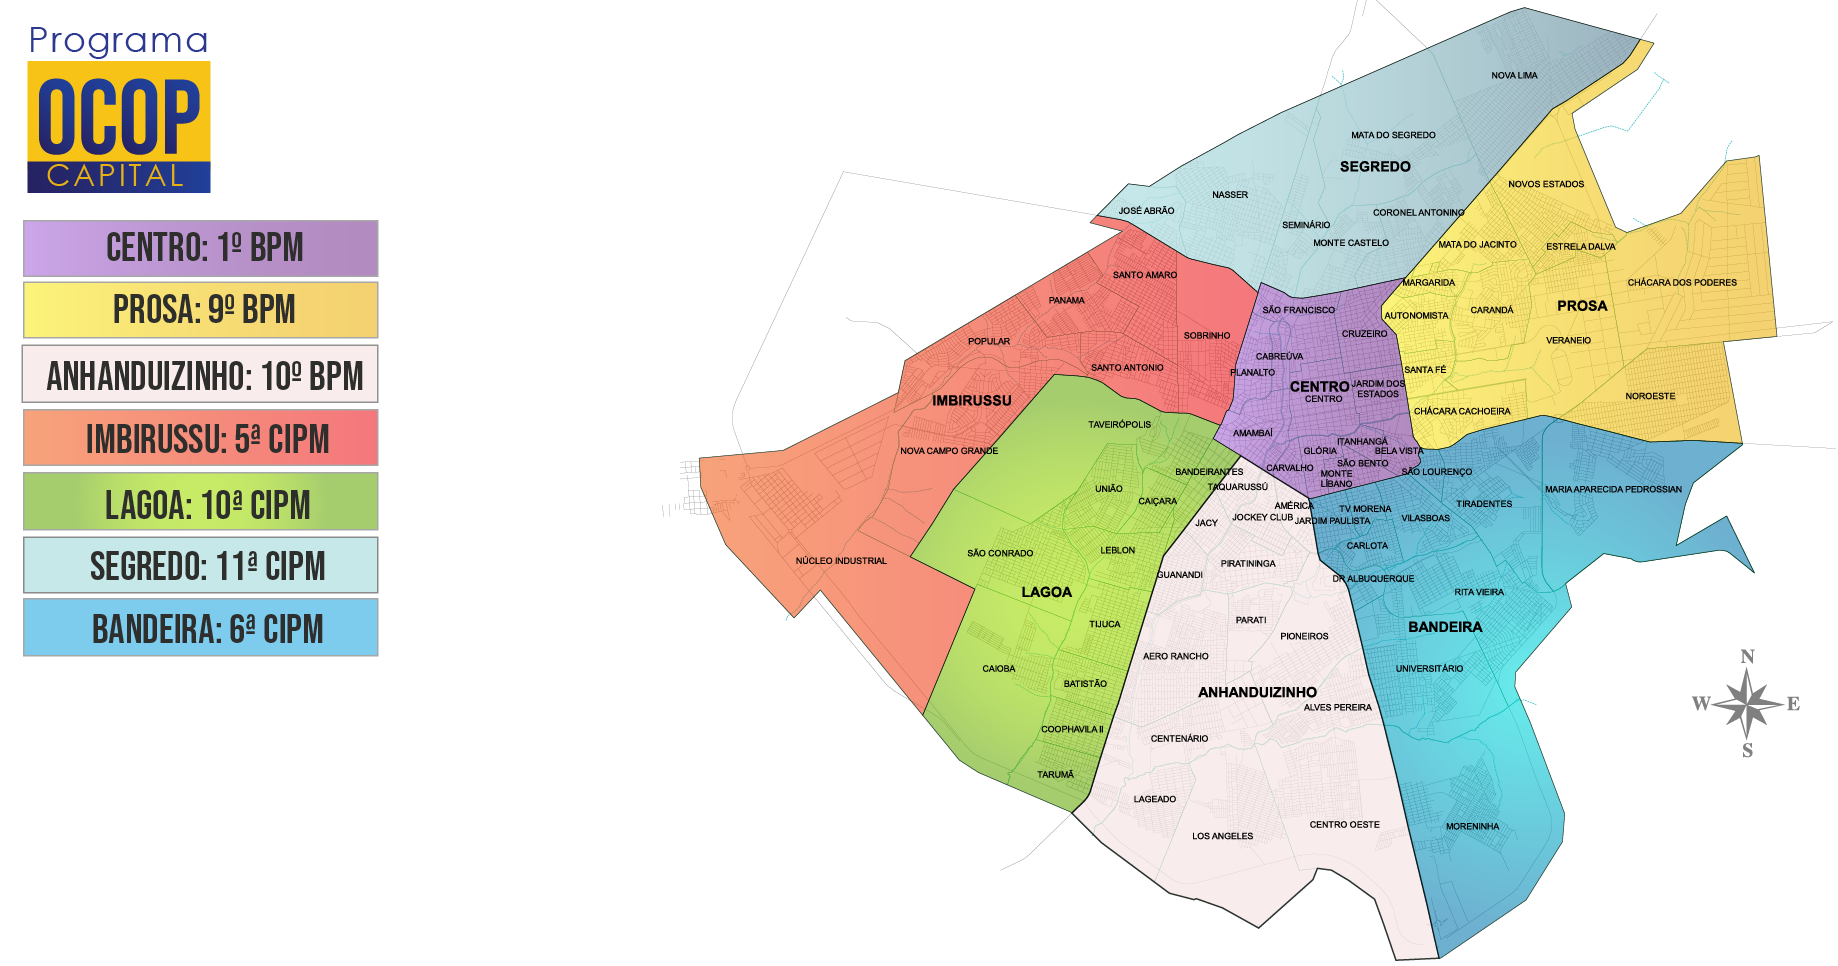

### Etapa de Entendimento dos Dados

In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
# Importando a base de dados (Dados Extraídos do Sistema SIGO)
df = pd.read_excel('analise10bpm.xlsx')

In [4]:
# Mostrando os 10 primeiros registros
df.head(10)

,ANO,MÊS,ÁREA,UNIDADE,OPERAÇÃO BLITZ,OPERAÇÃO EM APOIO A OUTRO ÓRGÃO,OPERAÇÃO POLICIAL,PESSOAS ABORDADAS,VEÍCULOS ABORDADOS - DUAS RODAS,VEÍCULOS ABORDADOS - QUATRO RODAS,...,ROUBO EM VIA URBANA,FURTO,ROUBO DE VEICULO,ROUBO EM RESIDENCIA,ROUBO A COMERCIO,FURTO EM RESIDENCIA,FURTO DE VEICULO,DROGAS,PERTURBAÇÃO,ARMA
0,2018,Janeiro,CPM,10º BPM,0,0,12,4752,0,1870,...,123,261,5,5,12,113,42,21,5,7
1,2018,Fevereiro,CPM,10º BPM,0,2,13,6364,1519,1177,...,89,214,16,6,9,77,34,20,4,4
2,2018,Março,CPM,10º BPM,18,0,3,3794,1071,680,...,110,294,12,10,18,105,50,24,8,7
3,2018,Abril,CPM,10º BPM,24,0,5,5364,1849,994,...,108,259,9,3,9,95,31,14,10,5
4,2018,Maio,CPM,10º BPM,31,9,0,4245,1372,695,...,112,284,10,2,4,101,29,18,5,10
5,2018,Junho,CPM,10º BPM,0,0,30,3935,1311,723,...,80,269,10,3,5,91,32,21,3,8
6,2018,Julho,CPM,10º BPM,0,0,35,4540,1452,759,...,94,234,4,2,2,79,27,9,12,5
7,2018,Agosto,CPM,10º BPM,3,0,26,8658,2684,1526,...,90,254,6,3,4,79,46,22,7,9
8,2018,Setembro,CPM,10º BPM,2,1,43,4222,1407,725,...,64,204,4,6,3,69,37,17,9,14
9,2018,Outubro,CPM,10º BPM,0,0,28,3847,1173,610,...,81,260,14,3,2,94,50,15,7,4


In [5]:
# Verificando o tamanho da base de dados
df.shape

(59, 44)

In [6]:
# Verificando a falta de preenchimento
df.isnull().sum()

ANO                                                                                           0
MÊS                                                                                           0
ÁREA                                                                                          0
UNIDADE                                                                                       0
OPERAÇÃO BLITZ                                                                                0
OPERAÇÃO EM APOIO A OUTRO ÓRGÃO                                                               0
OPERAÇÃO POLICIAL                                                                             0
PESSOAS ABORDADAS                                                                             0
VEÍCULOS ABORDADOS - DUAS RODAS                                                               0
VEÍCULOS ABORDADOS - QUATRO RODAS                                                             0
ARMA BRANCA                             

In [7]:
# Deletando os atributos que não irei usar
df.drop(columns=['ANO','MÊS','ÁREA','UNIDADE','DROGAS ','PERTURBAÇÃO','ARMA','HOMICIDIO DOLOSO','ROUBO','ROUBO DE VEICULO','FURTO','ROUBO EM RESIDENCIA','ROUBO A COMERCIO','FURTO EM RESIDENCIA','FURTO DE VEICULO'], axis=1, inplace=True)

In [8]:
round(df.describe())

,OPERAÇÃO BLITZ,OPERAÇÃO EM APOIO A OUTRO ÓRGÃO,OPERAÇÃO POLICIAL,PESSOAS ABORDADAS,VEÍCULOS ABORDADOS - DUAS RODAS,VEÍCULOS ABORDADOS - QUATRO RODAS,ARMA BRANCA,ARMAS DE FOGO,VEÍCULOS DUAS RODAS RECUPERADOS,VEÍCULOS DUAS RODAS REMOVIDOS AO DETRAN/CIRETRAN (Por conta de fiscalização de trânsito),...,FEMININO - ADOLESCENTE FORAGIDO (Nº de apreendidos por mandado de apreensão/evasão),Nº DE OCORRÊNCIAS QUE RESULTARAM EM AUTO DE PRISÃO FLAGRANTE DELITO,Nº DE OCORRÊNCIAS QUE RESULTARAM EM T.C.O,NOTIFICAÇÕES DE TRÂNSITO - (Nº de Infrações diversas - AIPs),POLICIAMENTO EM EVENTO,POLICIAMENTO ESCOLAR - RONDAS PREVENTIVAS,POSTOS FIXOS (PB),RONDAS PREVENTIVAS EM ÁREA RURAL,RONDAS PREVENTIVAS EM ÁREA URBANA,ROUBO EM VIA URBANA
count,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,...,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0
mean,1.0,1.0,20.0,3090.0,764.0,495.0,2.0,3.0,10.0,2.0,...,0.0,24.0,39.0,19.0,1.0,5.0,1.0,23.0,181.0,68.0
std,6.0,1.0,15.0,1268.0,453.0,307.0,2.0,2.0,5.0,3.0,...,0.0,12.0,29.0,20.0,2.0,15.0,4.0,17.0,65.0,20.0
min,0.0,0.0,0.0,1406.0,0.0,111.0,0.0,0.0,0.0,0.0,...,0.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,57.0,33.0
25%,0.0,0.0,9.0,2236.0,487.0,317.0,0.0,2.0,6.0,0.0,...,0.0,18.0,16.0,4.0,0.0,0.0,0.0,4.0,141.0,55.0
50%,0.0,0.0,17.0,2834.0,632.0,426.0,1.0,3.0,10.0,1.0,...,0.0,22.0,30.0,11.0,0.0,0.0,0.0,30.0,173.0,65.0
75%,0.0,1.0,29.0,3550.0,937.0,559.0,3.0,4.0,13.0,3.0,...,0.0,29.0,64.0,28.0,2.0,4.0,0.0,31.0,224.0,80.0
max,31.0,9.0,71.0,8658.0,2684.0,1870.0,10.0,9.0,22.0,11.0,...,1.0,80.0,125.0,94.0,8.0,92.0,29.0,76.0,326.0,123.0


Analisando o meu **atributo alvo** para a minha previsão = ROUBO EM VIA URBANA

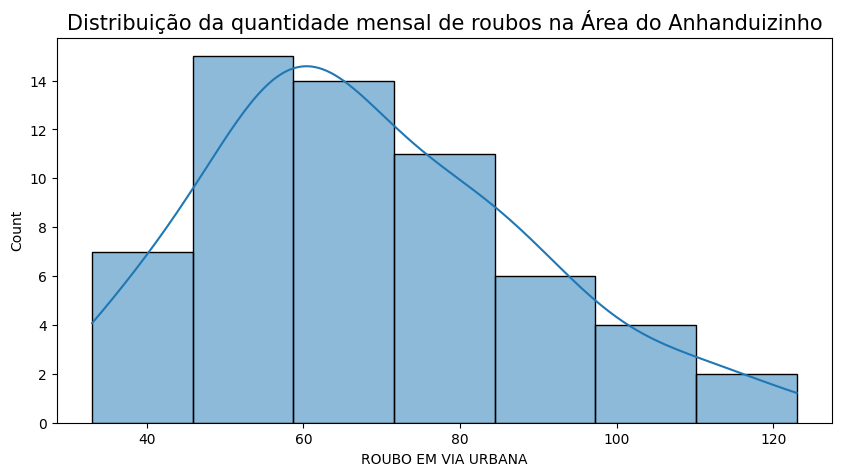

In [9]:
# Gráfico de histograma
plt.figure(figsize=(10,5))
sns.histplot(df['ROUBO EM VIA URBANA'], kde=True)
plt.title('Distribuição da quantidade mensal de roubos na Área do Anhanduizinho', fontsize=15)
plt.show()

In [10]:
df['ROUBO EM VIA URBANA'].min()

33

In [11]:
df[df['ROUBO EM VIA URBANA'] == 33].head()

,OPERAÇÃO BLITZ,OPERAÇÃO EM APOIO A OUTRO ÓRGÃO,OPERAÇÃO POLICIAL,PESSOAS ABORDADAS,VEÍCULOS ABORDADOS - DUAS RODAS,VEÍCULOS ABORDADOS - QUATRO RODAS,ARMA BRANCA,ARMAS DE FOGO,VEÍCULOS DUAS RODAS RECUPERADOS,VEÍCULOS DUAS RODAS REMOVIDOS AO DETRAN/CIRETRAN (Por conta de fiscalização de trânsito),...,FEMININO - ADOLESCENTE FORAGIDO (Nº de apreendidos por mandado de apreensão/evasão),Nº DE OCORRÊNCIAS QUE RESULTARAM EM AUTO DE PRISÃO FLAGRANTE DELITO,Nº DE OCORRÊNCIAS QUE RESULTARAM EM T.C.O,NOTIFICAÇÕES DE TRÂNSITO - (Nº de Infrações diversas - AIPs),POLICIAMENTO EM EVENTO,POLICIAMENTO ESCOLAR - RONDAS PREVENTIVAS,POSTOS FIXOS (PB),RONDAS PREVENTIVAS EM ÁREA RURAL,RONDAS PREVENTIVAS EM ÁREA URBANA,ROUBO EM VIA URBANA
28,0,0,52,3076,563,443,1,0,6,0,...,0,20,13,3,0,0,0,30,171,33
29,0,0,27,3000,555,485,0,3,3,1,...,1,19,8,20,0,0,0,30,168,33


In [12]:
df['ROUBO EM VIA URBANA'].max()

123

In [13]:
df[df['ROUBO EM VIA URBANA'] == 123].head()

,OPERAÇÃO BLITZ,OPERAÇÃO EM APOIO A OUTRO ÓRGÃO,OPERAÇÃO POLICIAL,PESSOAS ABORDADAS,VEÍCULOS ABORDADOS - DUAS RODAS,VEÍCULOS ABORDADOS - QUATRO RODAS,ARMA BRANCA,ARMAS DE FOGO,VEÍCULOS DUAS RODAS RECUPERADOS,VEÍCULOS DUAS RODAS REMOVIDOS AO DETRAN/CIRETRAN (Por conta de fiscalização de trânsito),...,FEMININO - ADOLESCENTE FORAGIDO (Nº de apreendidos por mandado de apreensão/evasão),Nº DE OCORRÊNCIAS QUE RESULTARAM EM AUTO DE PRISÃO FLAGRANTE DELITO,Nº DE OCORRÊNCIAS QUE RESULTARAM EM T.C.O,NOTIFICAÇÕES DE TRÂNSITO - (Nº de Infrações diversas - AIPs),POLICIAMENTO EM EVENTO,POLICIAMENTO ESCOLAR - RONDAS PREVENTIVAS,POSTOS FIXOS (PB),RONDAS PREVENTIVAS EM ÁREA RURAL,RONDAS PREVENTIVAS EM ÁREA URBANA,ROUBO EM VIA URBANA
0,0,0,12,4752,0,1870,0,0,0,0,...,0,80,36,8,1,0,0,0,193,123


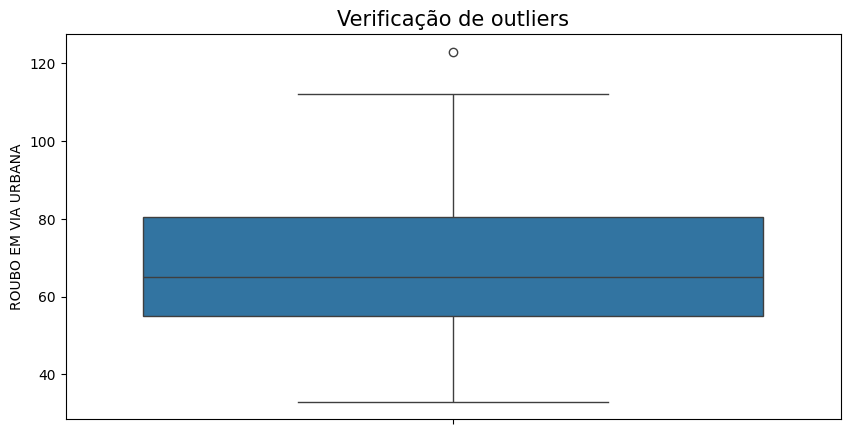

In [14]:
# Boxplot
plt.figure(figsize=(10,5))
sns.boxplot(df['ROUBO EM VIA URBANA'])
plt.title('Verificação de outliers', fontsize=15)
plt.show()

## Etapa de Pré-Processamento dos Dados

Tratando **outliers**

In [15]:
mean = np.mean(df['ROUBO EM VIA URBANA'], axis=0)
sd   = np.std(df['ROUBO EM VIA URBANA'], axis=0)

In [16]:
mean - 2 * sd

27.619126889412286

In [17]:
mean + 2 * sd

108.68595785635043

In [18]:
for x in df['ROUBO EM VIA URBANA']:
  if (x > mean + 2 * sd):
    print(x)

123
110
112


In [19]:
df.drop(df.loc[df['ROUBO EM VIA URBANA'] >= 110 ].index, inplace=True)

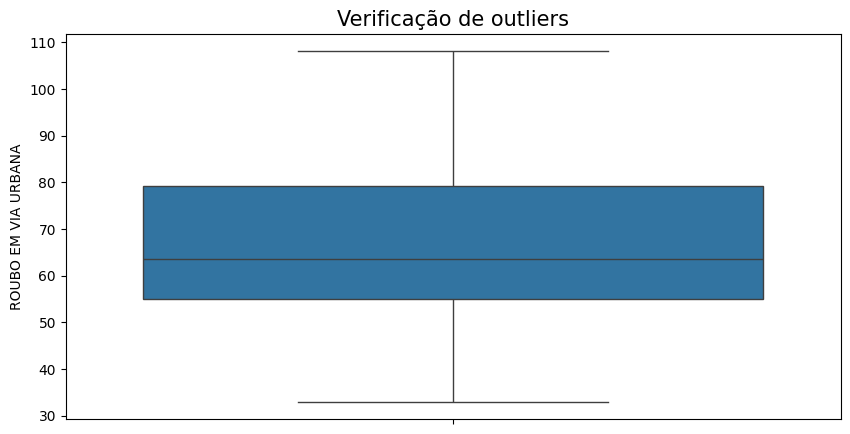

In [20]:
# Boxplot
plt.figure(figsize=(10,5))
sns.boxplot(df['ROUBO EM VIA URBANA'])
plt.title('Verificação de outliers', fontsize=15)
plt.show()

 **Correlação**
**Quando fazer análise de correlação?** <p>
Quando você tem uma hipótese de que o aumento ou queda em uma variável estão associados à evolução de outra variável, por exemplo, se aumentar o desconto, as vendas também aumentam.

**Correlação de Pearson**
<p>
O coeficiente de correlação de Pearson pode ter um intervalo de valores de +1 a -1. Um valor de 0 indica que não há associação entre as duas variáveis. Um valor maior que 0 indica uma associação positiva. Isto é, à medida que o valor de uma variável aumenta, o mesmo acontece com o valor da outra variável. Um valor menor que 0 indica uma associação negativa. Isto é, à medida que o valor de uma variável aumenta, o valor da outra diminui.

,OPERAÇÃO BLITZ,OPERAÇÃO EM APOIO A OUTRO ÓRGÃO,OPERAÇÃO POLICIAL,PESSOAS ABORDADAS,VEÍCULOS ABORDADOS - DUAS RODAS,VEÍCULOS ABORDADOS - QUATRO RODAS,ARMA BRANCA,ARMAS DE FOGO,VEÍCULOS DUAS RODAS RECUPERADOS,VEÍCULOS DUAS RODAS REMOVIDOS AO DETRAN/CIRETRAN (Por conta de fiscalização de trânsito),...,FEMININO - ADOLESCENTE FORAGIDO (Nº de apreendidos por mandado de apreensão/evasão),Nº DE OCORRÊNCIAS QUE RESULTARAM EM AUTO DE PRISÃO FLAGRANTE DELITO,Nº DE OCORRÊNCIAS QUE RESULTARAM EM T.C.O,NOTIFICAÇÕES DE TRÂNSITO - (Nº de Infrações diversas - AIPs),POLICIAMENTO EM EVENTO,POLICIAMENTO ESCOLAR - RONDAS PREVENTIVAS,POSTOS FIXOS (PB),RONDAS PREVENTIVAS EM ÁREA RURAL,RONDAS PREVENTIVAS EM ÁREA URBANA,ROUBO EM VIA URBANA
OPERAÇÃO BLITZ,1.000000,-0.077785,-0.113378,0.330790,0.418424,0.365641,-0.097214,0.023958,0.051047,-0.060058,...,-0.026302,-0.075224,-0.021844,-0.140463,0.255874,0.110904,-0.028055,-0.230940,0.029905,0.350486
OPERAÇÃO EM APOIO A OUTRO ÓRGÃO,-0.077785,1.000000,0.040591,-0.007814,-0.063050,-0.004976,-0.056995,-0.139209,0.046665,-0.035331,...,-0.159281,-0.034190,-0.130264,-0.098561,-0.152564,0.182229,-0.057393,0.040665,-0.138684,-0.093161
OPERAÇÃO POLICIAL,-0.113378,0.040591,1.000000,0.280976,0.249871,0.227742,-0.131803,-0.112169,-0.166432,-0.238870,...,0.104710,-0.134802,-0.387716,-0.108555,0.075148,-0.033294,0.026765,-0.046854,-0.135338,-0.056250
PESSOAS ABORDADAS,0.330790,-0.007814,0.280976,1.000000,0.962721,0.963028,-0.267178,-0.024061,0.243274,-0.227385,...,-0.068883,-0.157891,-0.326184,-0.390453,0.248066,0.387940,0.258318,-0.329730,-0.284281,0.533706
VEÍCULOS ABORDADOS - DUAS RODAS,0.418424,-0.063050,0.249871,0.962721,1.000000,0.936204,-0.270350,-0.001122,0.271192,-0.239479,...,-0.101446,-0.116693,-0.307563,-0.389398,0.240506,0.337804,0.220275,-0.364510,-0.251668,0.613788
VEÍCULOS ABORDADOS - QUATRO RODAS,0.365641,-0.004976,0.227742,0.963028,0.936204,1.000000,-0.324340,0.084798,0.280866,-0.214266,...,-0.049767,-0.111697,-0.296262,-0.414663,0.158361,0.435382,0.237552,-0.387082,-0.351527,0.548308
ARMA BRANCA,-0.097214,-0.056995,-0.131803,-0.267178,-0.270350,-0.324340,1.000000,0.141531,-0.038480,0.360278,...,0.018487,0.258515,0.481702,0.447760,0.016089,-0.073427,-0.119913,0.050535,0.313427,-0.219847
ARMAS DE FOGO,0.023958,-0.139209,-0.112169,-0.024061,-0.001122,0.084798,0.141531,1.000000,0.409401,0.065449,...,0.019671,0.289093,0.334014,-0.074013,-0.079727,0.056959,-0.038098,-0.020445,0.059129,0.112320
VEÍCULOS DUAS RODAS RECUPERADOS,0.051047,0.046665,-0.166432,0.243274,0.271192,0.280866,-0.038480,0.409401,1.000000,0.131453,...,-0.177861,0.314402,0.313214,-0.144812,0.113215,0.303252,0.039497,0.018326,0.191070,0.421289
VEÍCULOS DUAS RODAS REMOVIDOS AO DETRAN/CIRETRAN (Por conta de fiscalização de trânsito),-0.060058,-0.035331,-0.238870,-0.227385,-0.239479,-0.214266,0.360278,0.065449,0.131453,1.000000,...,0.060939,0.389463,0.678730,0.669398,-0.136765,-0.014868,-0.081679,0.004329,0.515307,-0.077553


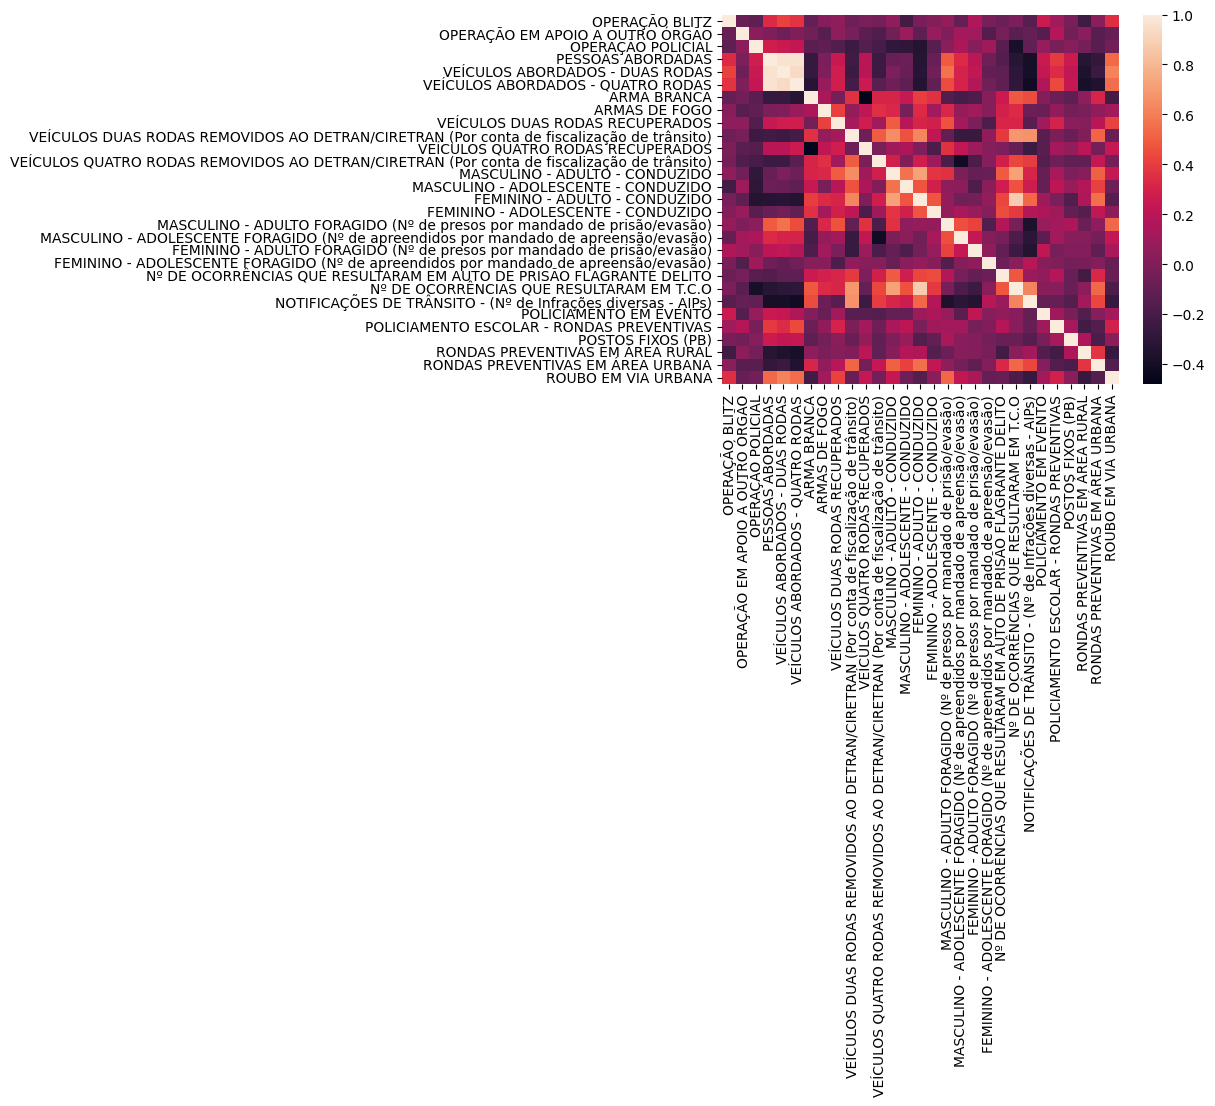

In [21]:
corr = df.corr(method='pearson')
corr = (corr)
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
corr

## Etapa de Modelagem dos Dados

In [22]:
y = df['ROUBO EM VIA URBANA'].values

In [23]:
y

array([ 89, 108,  80,  94,  90,  64,  81,  68,  58,  98,  68,  62,  89,
        99,  87,  84,  79,  65,  89,  80,  68,  61,  59,  61,  56,  33,
        33,  39,  48,  56,  50,  70,  56,  65,  55,  60,  40,  46,  58,
        78,  63,  66,  72,  55,  42,  55,  40,  50,  72,  82,  57,  51,
        40,  76,  76,  55])

In [24]:
X = df.drop(['ROUBO EM VIA URBANA'], axis=1)

In [25]:
X

,OPERAÇÃO BLITZ,OPERAÇÃO EM APOIO A OUTRO ÓRGÃO,OPERAÇÃO POLICIAL,PESSOAS ABORDADAS,VEÍCULOS ABORDADOS - DUAS RODAS,VEÍCULOS ABORDADOS - QUATRO RODAS,ARMA BRANCA,ARMAS DE FOGO,VEÍCULOS DUAS RODAS RECUPERADOS,VEÍCULOS DUAS RODAS REMOVIDOS AO DETRAN/CIRETRAN (Por conta de fiscalização de trânsito),...,FEMININO - ADULTO FORAGIDO (Nº de presos por mandado de prisão/evasão),FEMININO - ADOLESCENTE FORAGIDO (Nº de apreendidos por mandado de apreensão/evasão),Nº DE OCORRÊNCIAS QUE RESULTARAM EM AUTO DE PRISÃO FLAGRANTE DELITO,Nº DE OCORRÊNCIAS QUE RESULTARAM EM T.C.O,NOTIFICAÇÕES DE TRÂNSITO - (Nº de Infrações diversas - AIPs),POLICIAMENTO EM EVENTO,POLICIAMENTO ESCOLAR - RONDAS PREVENTIVAS,POSTOS FIXOS (PB),RONDAS PREVENTIVAS EM ÁREA RURAL,RONDAS PREVENTIVAS EM ÁREA URBANA
1,0,2,13,6364,1519,1177,1,4,16,1,...,1,0,27,35,6,3,92,2,7,102
3,24,0,5,5364,1849,994,0,4,11,1,...,4,0,17,35,0,5,16,0,0,193
5,0,0,30,3935,1311,723,0,4,17,1,...,3,0,36,17,0,1,51,2,7,91
6,0,0,35,4540,1452,759,0,4,15,1,...,2,0,18,34,10,0,5,0,0,137
7,3,0,26,8658,2684,1526,1,3,18,3,...,2,0,23,30,2,5,0,0,0,151
8,2,1,43,4222,1407,725,0,3,10,0,...,1,0,35,32,0,0,10,0,0,264
9,0,0,28,3847,1173,610,0,6,8,0,...,1,0,36,38,8,0,0,0,0,156
10,0,0,22,5038,1364,817,0,3,11,1,...,2,0,17,24,1,1,9,29,46,110
11,0,1,50,4659,1180,744,0,2,2,0,...,3,0,10,10,4,0,0,2,28,137
12,0,0,36,4602,1455,781,1,5,8,0,...,4,0,14,11,2,5,0,0,0,93


In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler(feature_range= (0,1))
rescaledX = scaler.fit_transform(X)

In [28]:
# Os valores dos atributos armazenados na varável X agora estão normalizados
rescaledX

array([[0.        , 0.66666667, 0.18309859, ..., 0.06896552, 0.09210526,
        0.16728625],
       [1.        , 0.        , 0.07042254, ..., 0.        , 0.        ,
        0.50557621],
       [0.        , 0.        , 0.42253521, ..., 0.06896552, 0.09210526,
        0.12639405],
       ...,
       [0.        , 0.        , 0.08450704, ..., 0.        , 0.55263158,
        0.72862454],
       [0.        , 0.        , 0.04225352, ..., 0.        , 0.39473684,
        0.43122677],
       [0.        , 0.33333333, 0.05633803, ..., 0.        , 0.44736842,
        0.51301115]])

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [30]:
X_train, X_test, y_train, y_test = train_test_split(rescaledX, y, test_size=0.3, random_state=42)

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lm = LinearRegression()

In [33]:
lm.fit(X_train, y_train)

LinearRegression()

In [34]:
result = lm.predict(X_test)

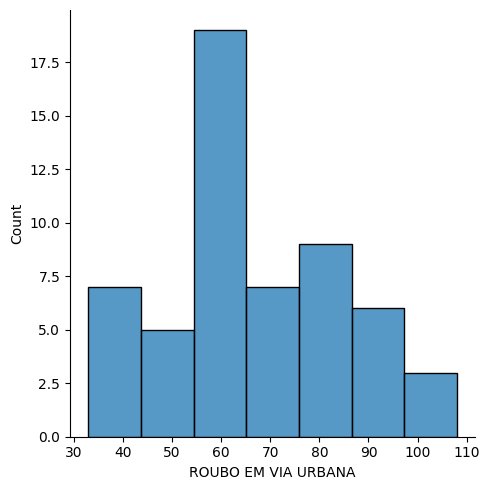

In [35]:
sns.displot(df, x='ROUBO EM VIA URBANA')
plt.tight_layout()

In [36]:
from sklearn import metrics

In [37]:
print('MAE:', metrics.mean_absolute_error(y_test, result))
print('MSE:', metrics.mean_squared_error(y_test, result))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, result)))
print('R:', metrics.r2_score(y_test, result))

MAE: 41.38197007240366
MSE: 2119.546771969303
RMSE: 46.03853572790194
R: -4.712371466531713


In [38]:
def adjusted_r2(y_test, result, X_train):

  from sklearn.metrics import r2_score

  adj_r2 = (1 - ((1 - r2_score(y_test, result)) * (len(y_test) - 1)) /
          (len(y_test) - X_train.shape[1] - 1))

  return adj_r2

In [39]:
adjusted_r2(y_test,result,X_train)

8.61649528870895

In [40]:
import numpy as np

MAPE = np.mean(np.abs((y_test - result) / y_test)) * 100

print(f"Valor do MAPE dado em percentual: {MAPE}")

Valor do MAPE dado em percentual: 70.52619112964035


In [41]:
# Qual variável é mais importante para o meu modelo?
coef = pd.DataFrame(lm.coef_, X.columns, columns=['Coefs'])
coef

,Coefs
OPERAÇÃO BLITZ,33.551267
OPERAÇÃO EM APOIO A OUTRO ÓRGÃO,3.800654
OPERAÇÃO POLICIAL,19.866829
PESSOAS ABORDADAS,156.758083
VEÍCULOS ABORDADOS - DUAS RODAS,188.730852
VEÍCULOS ABORDADOS - QUATRO RODAS,-280.088469
ARMA BRANCA,-56.446999
ARMAS DE FOGO,48.535298
VEÍCULOS DUAS RODAS RECUPERADOS,-59.156109
VEÍCULOS DUAS RODAS REMOVIDOS AO DETRAN/CIRETRAN (Por conta de fiscalização de trânsito),-37.403696


In [42]:
coef.sort_values(by='Coefs', ascending=False).head(n=30)

,Coefs
VEÍCULOS ABORDADOS - DUAS RODAS,188.730852
PESSOAS ABORDADAS,156.758083
MASCULINO - ADULTO - CONDUZIDO,90.551522
VEÍCULOS QUATRO RODAS REMOVIDOS AO DETRAN/CIRETRAN (Por conta de fiscalização de trânsito),60.378257
RONDAS PREVENTIVAS EM ÁREA RURAL,60.321638
POLICIAMENTO ESCOLAR - RONDAS PREVENTIVAS,49.464091
ARMAS DE FOGO,48.535298
OPERAÇÃO BLITZ,33.551267
MASCULINO - ADOLESCENTE FORAGIDO (Nº de apreendidos por mandado de apreensão/evasão),25.816940
MASCULINO - ADULTO FORAGIDO (Nº de presos por mandado de prisão/evasão),24.108926


In [43]:
coef[coef['Coefs'] < 0.0]

,Coefs
VEÍCULOS ABORDADOS - QUATRO RODAS,-280.088469
ARMA BRANCA,-56.446999
VEÍCULOS DUAS RODAS RECUPERADOS,-59.156109
VEÍCULOS DUAS RODAS REMOVIDOS AO DETRAN/CIRETRAN (Por conta de fiscalização de trânsito),-37.403696
VEÍCULOS QUATRO RODAS RECUPERADOS,-32.152827
FEMININO - ADULTO - CONDUZIDO,-8.805875
FEMININO - ADULTO FORAGIDO (Nº de presos por mandado de prisão/evasão),-64.671136
Nº DE OCORRÊNCIAS QUE RESULTARAM EM T.C.O,-27.229265
NOTIFICAÇÕES DE TRÂNSITO - (Nº de Infrações diversas - AIPs),-22.758570
POSTOS FIXOS (PB),-48.685271


In [44]:
# Eliminando os atributos que não estão ajudando na previsão do meu algoritmo linear regression
df.drop(columns=['VEÍCULOS ABORDADOS - QUATRO RODAS',
                 'ARMA BRANCA',
                 'VEÍCULOS DUAS RODAS RECUPERADOS',
                 'VEÍCULOS DUAS RODAS REMOVIDOS AO DETRAN/CIRETRAN (Por conta de fiscalização de trânsito)',
                 'VEÍCULOS QUATRO RODAS RECUPERADOS',
                 'FEMININO - ADULTO - CONDUZIDO',
                 'FEMININO - ADULTO FORAGIDO (Nº de presos por mandado de prisão/evasão)',
                 'Nº DE OCORRÊNCIAS QUE RESULTARAM EM T.C.O',
                 'NOTIFICAÇÕES DE TRÂNSITO - (Nº de Infrações diversas - AIPs)',
                 'POSTOS FIXOS (PB)',
                 'RONDAS PREVENTIVAS EM ÁREA URBANA'], axis=1, inplace=True)


Testando outro Algoritmo

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
rf = RandomForestRegressor()

In [47]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [48]:
result2 = rf.predict(X_test)

In [49]:
from sklearn import metrics

In [50]:
print('MAE:', metrics.mean_absolute_error(y_test, result2))
print('MSE:', metrics.mean_squared_error(y_test, result2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, result2)))
print('R:', metrics.r2_score(y_test, result2))

MAE: 12.793529411764707
MSE: 238.4812882352942
RMSE: 15.442839383846941
R: 0.3572712222097879


In [51]:
def adjusted_r2(y_test, result2, X_train):

  from sklearn.metrics import r2_score

  adj_r2 = (1 - ((1 - r2_score(y_test, result2)) * (len(y_test) - 1)) /
          (len(y_test) - X_train.shape[1] - 1))

  return adj_r2

In [52]:
adjusted_r2(y_test,result2,X_train)

1.8569717037202826

In [53]:
import numpy as np

MAPE = np.mean(np.abs((y_test - result2) / y_test)) * 100

print(f"Valor do MAPE dado em percentual: {MAPE}")

Valor do MAPE dado em percentual: 21.053269232527416
